In [ ]:
!pip install shap

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
import mlflow
import shap
import lime
import lime.lime_tabular
import tqdm as notebook_tqdm

c:\Users\Hello\Desktop\Html Tutorial\Document\KAIM Courses\Week-08-9_Adey_Innovations\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
cleaned_fraud_data = pd.read_csv('../data/cleaned_Fraud_Data.csv')

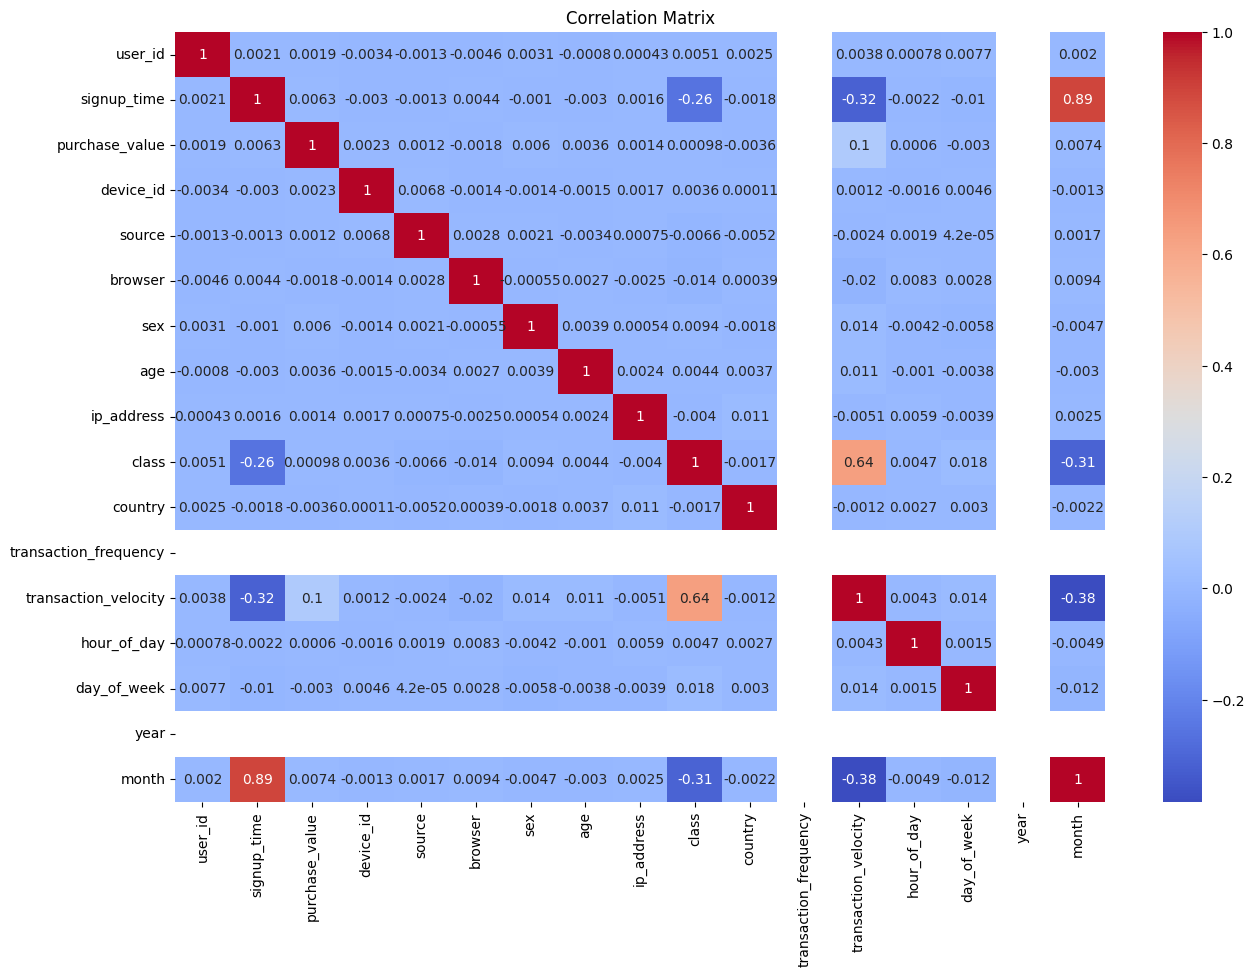

In [14]:
def correlation_analysis(data):
    # Select only numeric columns
    numeric_data = data.select_dtypes(include=np.number)
    
    # Compute correlation matrix
    correlation_matrix = numeric_data.corr()
    
    # Plot heatmap
    plt.figure(figsize=(15, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()

# Perform correlation analysis
correlation_analysis(cleaned_fraud_data)

In [45]:
# Separate features and target variable
X = cleaned_fraud_data.drop('class', axis=1)
y = cleaned_fraud_data['class']

X = X.fillna(0)

In [46]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Start MLflow experiment
mlflow.set_experiment("Fraud Detection")

<Experiment: artifact_location='file:///c:/Users/Hello/Desktop/Html%20Tutorial/Document/KAIM%20Courses/Week-08-9_Adey_Innovations/notebooks/mlruns/284352998765772872', creation_time=1729578899525, experiment_id='284352998765772872', last_update_time=1729578899525, lifecycle_stage='active', name='Fraud Detection', tags={}>

c:\Users\Hello\Desktop\Html Tutorial\Document\KAIM Courses\Week-08-9_Adey_Innovations\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


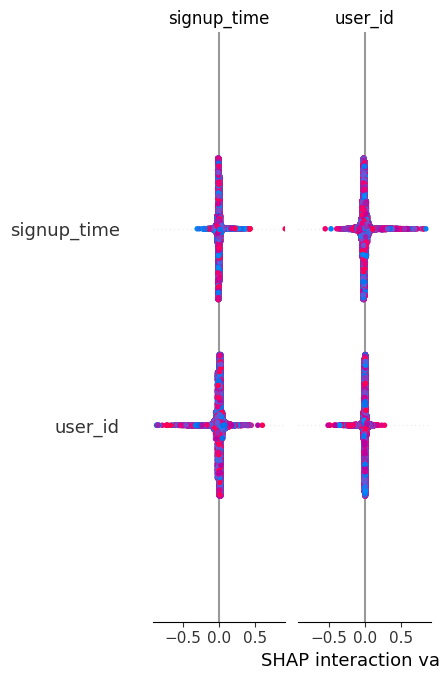

2024/10/21 19:20:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Accuracy: 0.9047143007471324


In [47]:
# Decision Tree model training
with mlflow.start_run(run_name="Decision Tree"):
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)

    # SHAP explanations
    explainer = shap.Explainer(model)
    shap_values = explainer.shap_values(X_test)

    # LIME explanations
    explainer_lime = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=['0', '1'])

    # LIME feature importance plot for a specific prediction
    observation = X_test.iloc[0]  
    explanation = explainer_lime.explain_instance(observation.values, model.predict_proba, num_features=len(X_train.columns))
    explanation.show_in_notebook(show_predicted_value=True)

    # SHAP summary plot
    shap.summary_plot(shap_values, X_test)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)

    # Log parameters and metrics
    mlflow.log_params(model.get_params())
    mlflow.log_metric("accuracy", accuracy)

    # Log the trained model
    mlflow.sklearn.log_model(model, "DecisionTreeModel")

    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

In [63]:
shap.initjs()

# Assuming you have a trained model and explainer
shap_values = explainer.shap_values(X_test.iloc[100])  # Calculate SHAP values for the 100th observation

# Now you can use the SHAP values in the force_plot
shap.plots.force(explainer.expected_value[0], shap_values)

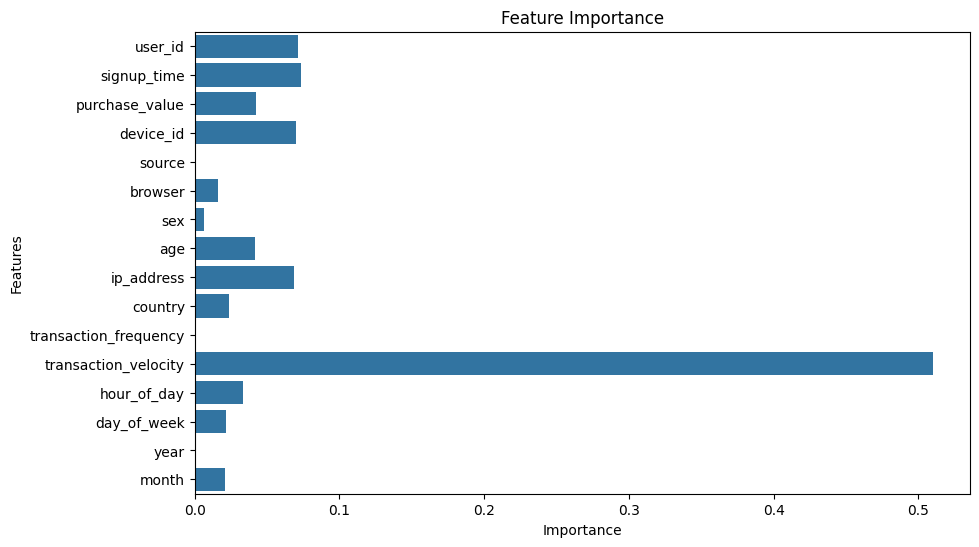

In [50]:
model = DecisionTreeClassifier()
model.fit(X, y)
feature_importance = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_names)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

Text(0.5, 0, 'actual')

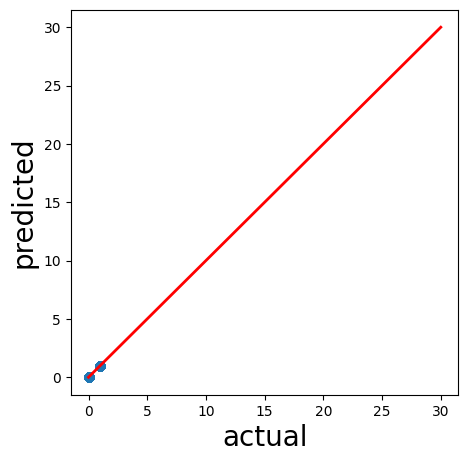

In [51]:
y_pred = model.predict(X_test)
#model evaluation
plt.figure(figsize=(5,5 ))
plt.scatter(y_test,y_pred)
plt.plot([0,30],[0,30],color='r',linestyle='-',linewidth=2)
plt.ylabel('predicted',size=20)
plt.xlabel('actual',size=20)

In [52]:
#get shap values
explainer=shap.Explainer(model)
shap_values=explainer(X_test)

In [53]:
np.shape(shap_values.values)

(19006, 16, 2)

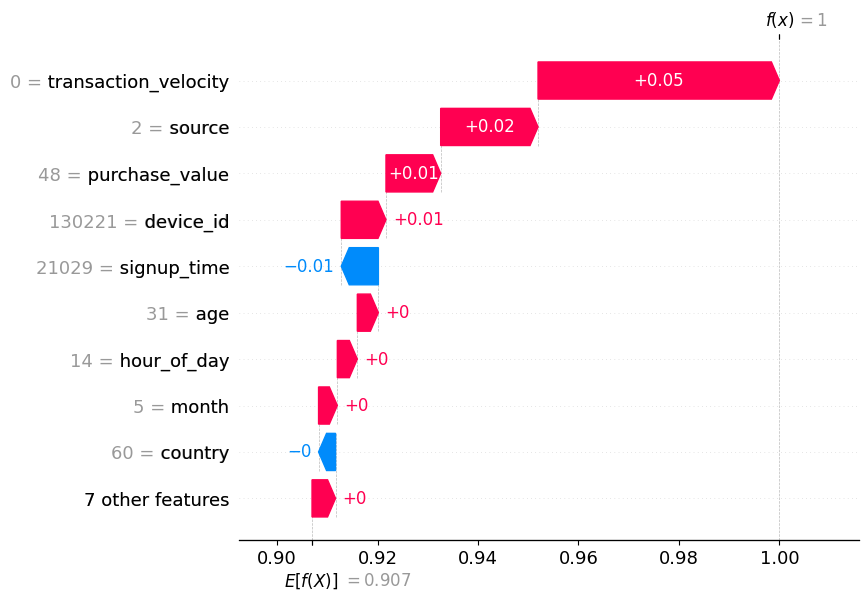

In [54]:
# waterfall plot
shap.plots.waterfall(shap_values[0, :, 0])  # For the first observation and the first outputlots the waterfall for the first observation

In [32]:
X_test

user_id  signup_time  purchase_value  device_id  source  browser  sex  \
91388    76741        21029              48     130221       2        2    1   
64851   147834        40397              53       8032       1        0    0   
93599      726        29926              64     135033       2        4    1   
94242   276658        20771              77     103304       0        1    0   
60130   342441        32591              18       8177       0        1    0   
...        ...          ...             ...        ...     ...      ...  ...   
74876   382738        91883              29     129776       2        4    1   
17810   149808        61773              13       8405       0        0    1   
18692    71216        87297              53       8719       2        2    0   
70790   203608        20166              40      54077       0        1    0   
720     164008        45671              43      43671       0        0    0   

       age  ip_address  country  transaction_frequency  transaction_velocity  \
91388   31   631435415       60                      1                     0   
64851   45  3687572319       84                      1                     0   
93599   43  2563287234       37                      1                     0   
94242   19   316147365      171                      1                     0   
60130   30  1400320285      118                      1                     0   
...    ...         ...      ...                    ...                   ...   
74876   31  2043604628       36                      1                     0   
17810   36  2926180629      171                      1                     0   
18692   39  1502853953      156                      1                     0   
70790   24   824539456       76                      1                     0   
720     22   723439069       84                      1                     0   

       hour_of_day  day_of_week  year  month  
91388         14.0          1.0  2015      5  
64851         22.0          4.0  2015      7  
93599         21.0          2.0  2015      4  
94242         14.0          6.0  2015      5  
60130          3.0          1.0  2015      7  
...            ...          ...   ...    ...  
74876         21.0          4.0  2015     10  
17810         10.0          5.0  2015      9  
18692         23.0          6.0  2015     10  
70790         14.0          6.0  2015      5  
720            3.0          0.0  2015      8  

[19006 rows x 16 columns]

In [55]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95027 entries, 0 to 95026
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                95027 non-null  int64  
 1   signup_time            95027 non-null  int64  
 2   purchase_value         95027 non-null  int64  
 3   device_id              95027 non-null  int64  
 4   source                 95027 non-null  int64  
 5   browser                95027 non-null  int64  
 6   sex                    95027 non-null  int64  
 7   age                    95027 non-null  int64  
 8   ip_address             95027 non-null  int64  
 9   country                95027 non-null  int64  
 10  transaction_frequency  95027 non-null  int64  
 11  transaction_velocity   95027 non-null  int64  
 12  hour_of_day            95027 non-null  float64
 13  day_of_week            95027 non-null  float64
 14  year                   95027 non-null  int64  
 15  mo

2024/10/21 21:27:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
c:\Users\Hello\Desktop\Html Tutorial\Document\KAIM Courses\Week-08-9_Adey_Innovations\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


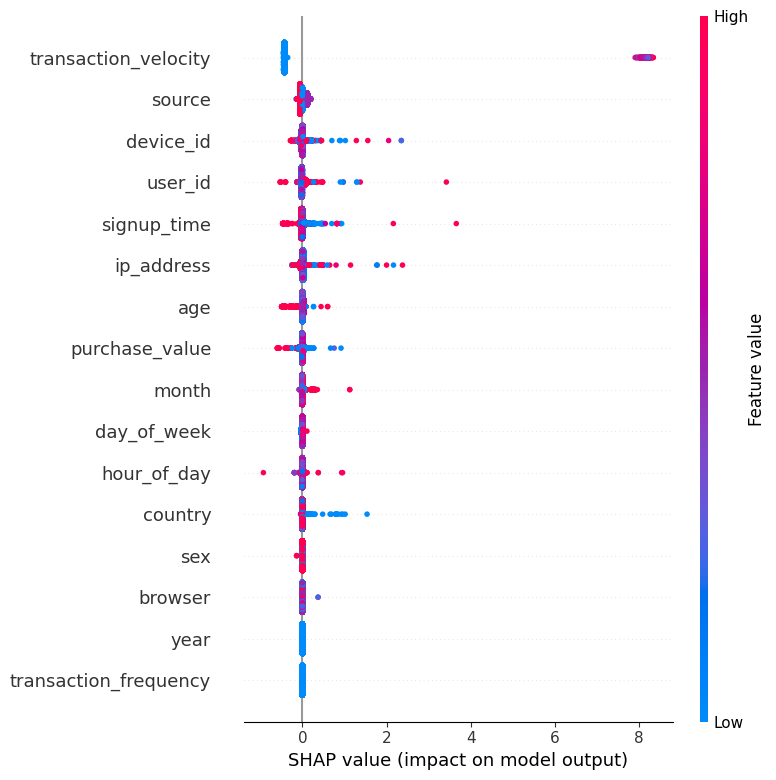

Accuracy: 0.9557508155319373


In [56]:
# Gradient Boosting model training
with mlflow.start_run(run_name="Gradient Boosting"):
    model = GradientBoostingClassifier()
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    
    # Log parameters and metrics
    mlflow.log_params(model.get_params())
    mlflow.log_metric("accuracy", accuracy)
    
    # Log the trained model
    mlflow.sklearn.log_model(model, "GradientBoostingModel")
    
    # LIME explanations
    explainer_lime = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=['0', '1'])
    
    # LIME Feature Importance Plot for a specific prediction
    observation = X_test.iloc[0]  # Replace with the desired observation for which you want to visualize the feature importance
    explanation = explainer_lime.explain_instance(observation.values, model.predict_proba, num_features=len(X_train.columns))
    explanation.show_in_notebook(show_predicted_value=True)
    
    # SHAP explanations
    explainer_shap = shap.Explainer(model)
    shap_values = explainer_shap.shap_values(X_test)
    
    # SHAP Summary Plot
    shap.summary_plot(shap_values, X_test)
    #shap.plots.bar(shap_values)
    
    accuracy = accuracy_score(y_test, y_pred)
    
print("Accuracy:", accuracy)

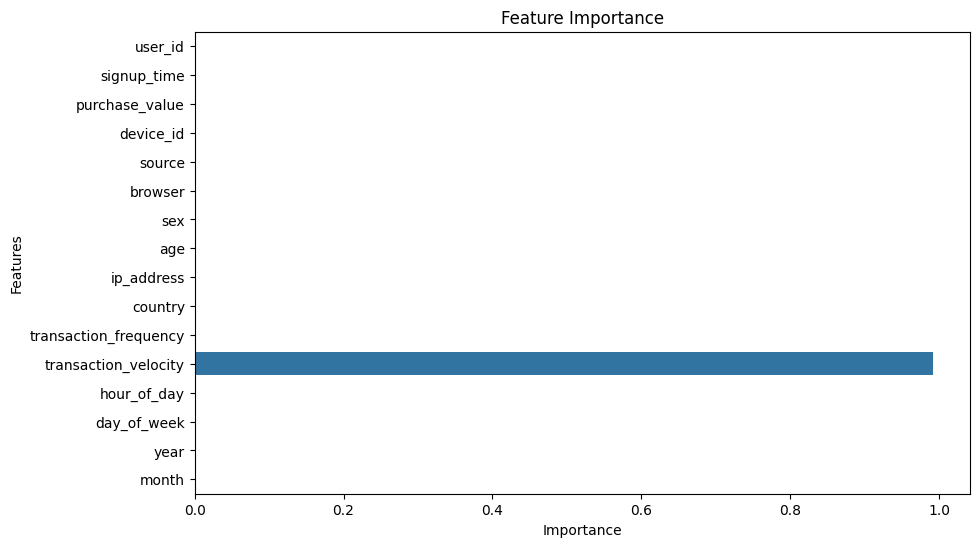

In [57]:
model =  GradientBoostingClassifier()
model.fit(X, y)
feature_importance = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_names)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [58]:
shap.initjs()

In [59]:
# Assuming you have a trained model and explainer
shap_values = explainer.shap_values(X_test.iloc[100])  # Calculate SHAP values for the 100th observation

# Now you can use the SHAP values in the force_plot
shap.plots.force(explainer.expected_value[0], shap_values)

In [60]:
# For the first output:
shap.plots.force(explainer.expected_value[0], shap_values[..., 0]) 

# For the second output:
shap.plots.force(explainer.expected_value[1], shap_values[..., 1])

In [61]:
# MLP model training
with mlflow.start_run(run_name="MLP"):
    model = MLPClassifier()
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    
    # Log parameters and metrics
    mlflow.log_params(model.get_params())
    mlflow.log_metric("accuracy", accuracy)
    
    # Log the trained model
    mlflow.sklearn.log_model(model, "MLPModel")
    
    # LIME explanations
    explainer_lime = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=['0', '1'])
    
    # LIME Feature Importance Plot for a specific prediction
    observation = X_test.iloc[0]  # Replace with the desired observation for which you want to visualize the feature importance
    explanation = explainer_lime.explain_instance(observation.values, model.predict_proba, num_features=len(X_train.columns))
    explanation.show_in_notebook(show_predicted_value=True)
    
   
    
    accuracy = accuracy_score(y_test, y_pred)
    
print("Accuracy:", accuracy)

2024/10/21 21:32:22 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
c:\Users\Hello\Desktop\Html Tutorial\Document\KAIM Courses\Week-08-9_Adey_Innovations\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


Accuracy: 0.9061349047669157


In [62]:
from IPython.display import display, Javascript
display(Javascript("""
    require.config({
        paths: {
            d3: 'https://d3js.org/d3.v3.min',
            jquery: 'https://ajax.googleapis.com/ajax/libs/jquery/1.11.1/jquery.min',
            'shap': 'https://cdn.jsdelivr.net/npm/@jupyter-widgets/jupyterlab-manager@2/dist/embed-amd'
        }
    });
    require(['shap'], function(shap) {
        shap.initjs();
    });
"""))

<IPython.core.display.Javascript object>